<a href="https://www.kaggle.com/code/ainurrohmanbwx/stock-price-analytics?scriptVersionId=157492153" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Abstract

In this stock price analysis project, data has been gathered from four prominent companies: Amazon, Apple, Microsoft, and Google, covering a 5-year span from 2013 to 2018. The primary focus lies in understanding the fluctuations in stock prices for these companies based on closing prices. The analytical approaches include assessing average trends through moving averages, analyzing Apple's closing prices through resampling at monthly, yearly, and quarterly intervals, and conducting multivariate analysis to discern correlations among the stocks. Additionally, correlation analysis is employed to quantify the relationships between the closing prices of the four companies. The objective is to offer comprehensive insights into the stock price dynamics of these leading technology firms over the specified time frame.

# Load Data

In [1]:
# Disable warning

import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
company_list = [
    '/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/AAL_data.csv',
    '/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/AMZN_data.csv',
    '/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/GOOG_data.csv',
    '/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/MSFT_data.csv'
]

In [3]:
import pandas as pd

company_data = pd.DataFrame()

for file in company_list:
    temp_df = pd.read_csv(file)
    company_data = pd.concat([company_data, temp_df], ignore_index=True)

In [4]:
company_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [5]:
company_data.tail()

,date,open,high,low,close,volume,Name
4747,2018-02-01,94.79,96.070,93.5813,94.26,47227882,MSFT
4748,2018-02-02,93.64,93.970,91.5000,91.78,47867753,MSFT
4749,2018-02-05,90.56,93.240,88.0000,88.00,51031465,MSFT
4750,2018-02-06,86.89,91.475,85.2500,91.33,67998564,MSFT
4751,2018-02-07,90.49,91.770,89.2000,89.61,41107592,MSFT


In [6]:
company_data.shape

(4752, 7)

In [7]:
company_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [8]:
company_data.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [9]:
# Show company classification
company_data['Name'].unique()

array(['AAL', 'AMZN', 'GOOG', 'MSFT'], dtype=object)

# Data Preprocessing

### Is there an incorrect data type?

In [10]:
# convert data type "date" from object to datetime

company_data["date"] = company_data["date"].astype("datetime64[ns]")

In [11]:
type(company_data["date"])

pandas.core.series.Series

### Are there any missing values?

In [12]:
# Check for missing values
missing_values = company_data.isnull().sum()

# Display columns with missing values and the count of missing values
missing_values = missing_values[missing_values > 0]

if not missing_values.empty:
    print("Columns with missing values:")
    for column, count in missing_values.items():
        print(f"{column}: {count} missing values")
else:
    print("There are no columns with missing value")

There are no columns with missing value


# Analyze

### What was the fluctuation in the stock price over time?


Analysis of stock price fluctuations based on closing prices during a certain period provides an in-depth understanding of market volatility and trends. In a given year, fluctuations in the stock prices of Amazon, Apple, Microsoft, and Google reflect the unique dynamics of each company amidst changing economic and industry conditions. By looking at stock price movement charts, crucial moments can be identified such as spikes or declines that can be aligned with key events in the industry or company decisions. This analysis provides crucial insights for investors to evaluate investment risks and opportunities, and helps market analysts plan more adaptive and effective strategies.

In [13]:
unique_companies = company_data['Name'].unique()

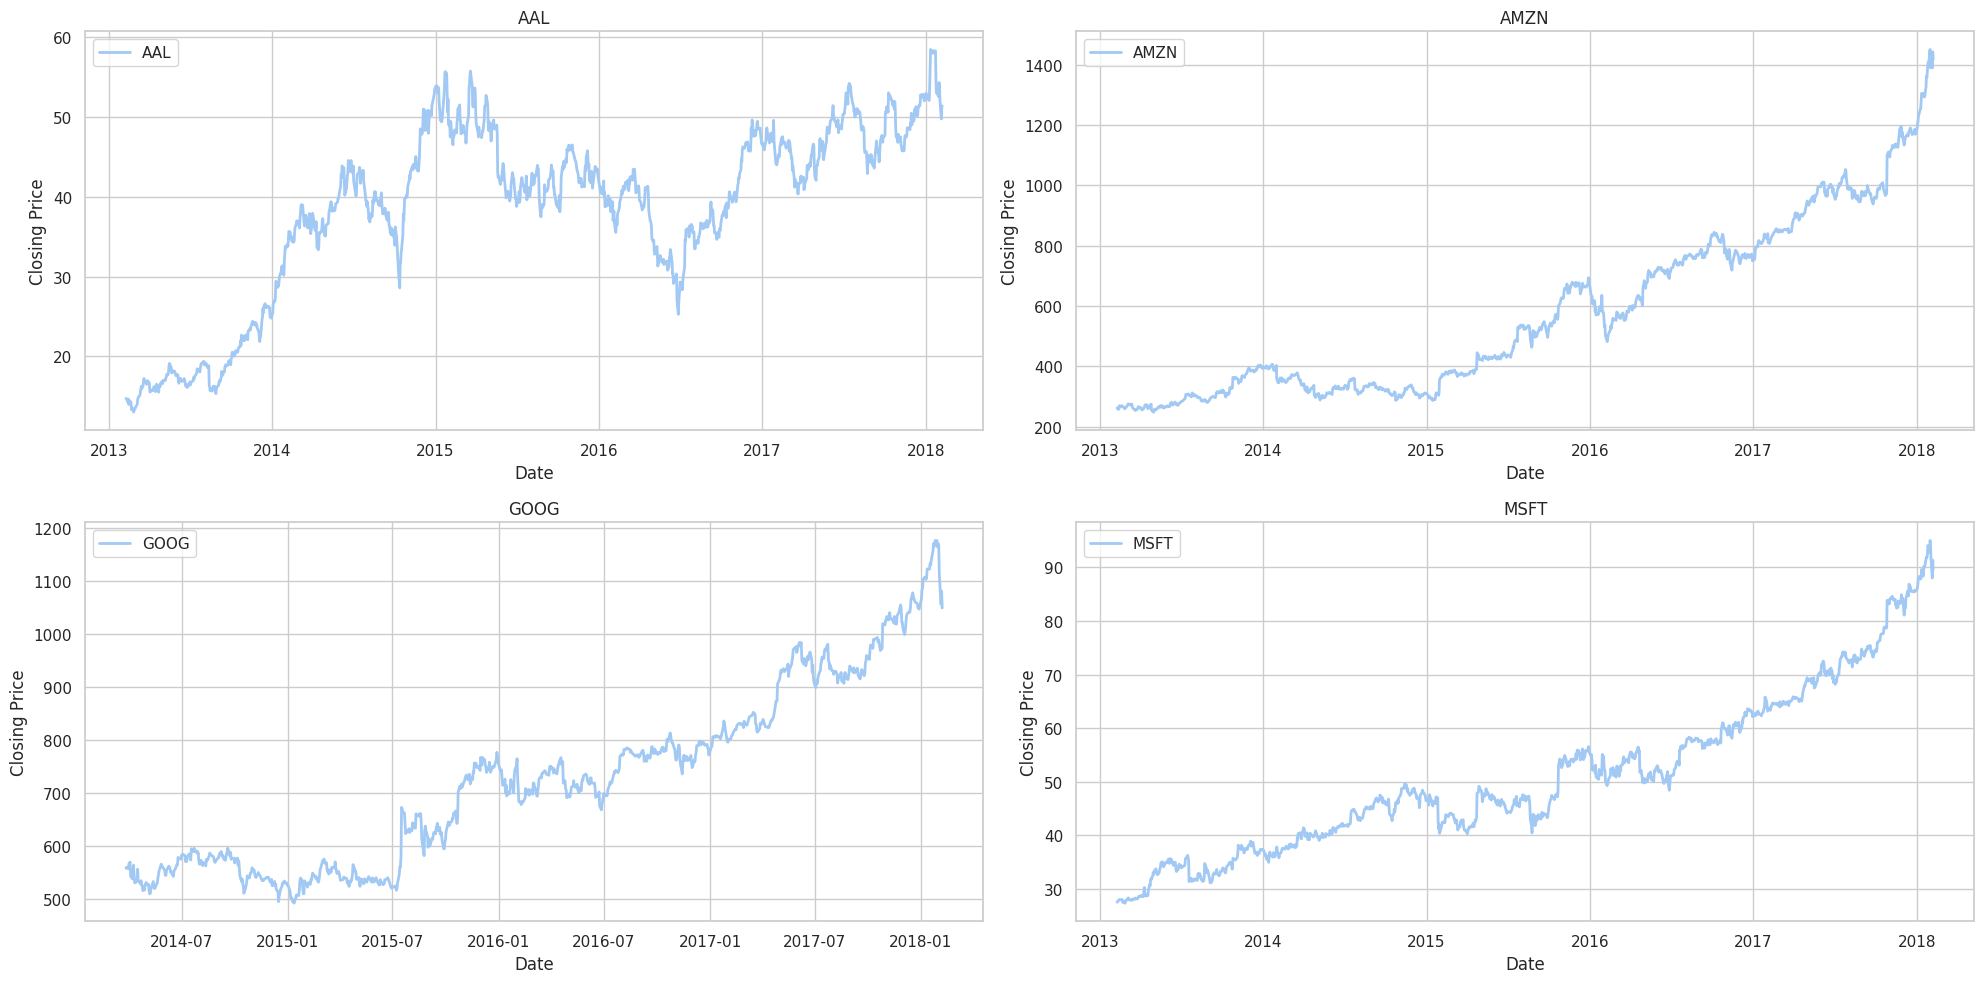

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns  

sns.set(style="whitegrid", palette="pastel")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axes = axes.flatten()

for index, company_name in enumerate(unique_companies):
    ax = axes[index]
    
    filter_company = company_data['Name'] == company_name
    company_subset = company_data[filter_company]
    
    ax.plot(company_subset['date'], company_subset['close'], label=company_name, linewidth=2)
    
    ax.set_title(company_name)
    ax.set_xlabel('Date')
    ax.set_ylabel('Closing Price')
    
    ax.legend()

plt.tight_layout()
plt.show()

### What was the average trend of different stocks using the moving average?

Through moving average analysis based on closing prices, the average stock trend for each company can be identified, namely Amazon, Apple, Microsoft and Google. Moving averages provide a more refined view of daily fluctuations and help identify long-term or short-term trends. By paying attention to differences in moving averages between companies, we can see how each stock's performance reacts to economic or industry events. This analysis can help investors and market analysts to make more informed decisions and determine smarter investment strategies based on the average trend depicted through the moving average closing price.

In [15]:
company_new = company_data.copy()

moving_averages = [10, 20, 30]

for moving_average_period in moving_averages:
    company_new[f'close_{moving_average_period}_MA'] = company_new['close'].rolling(moving_average_period).mean()

In [16]:
company_new.set_index('date',inplace=True)

In [17]:
company_new.head()

,open,high,low,close,volume,Name,close_10_MA,close_20_MA,close_30_MA
date,,,,,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,NaN,NaN,NaN
2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,NaN,NaN,NaN
2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,NaN,NaN,NaN
2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,NaN,NaN,NaN
2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,NaN,NaN,NaN


In [18]:
company_new.columns

Index(['open', 'high', 'low', 'close', 'volume', 'Name', 'close_10_MA',
       'close_20_MA', 'close_30_MA'],
      dtype='object')

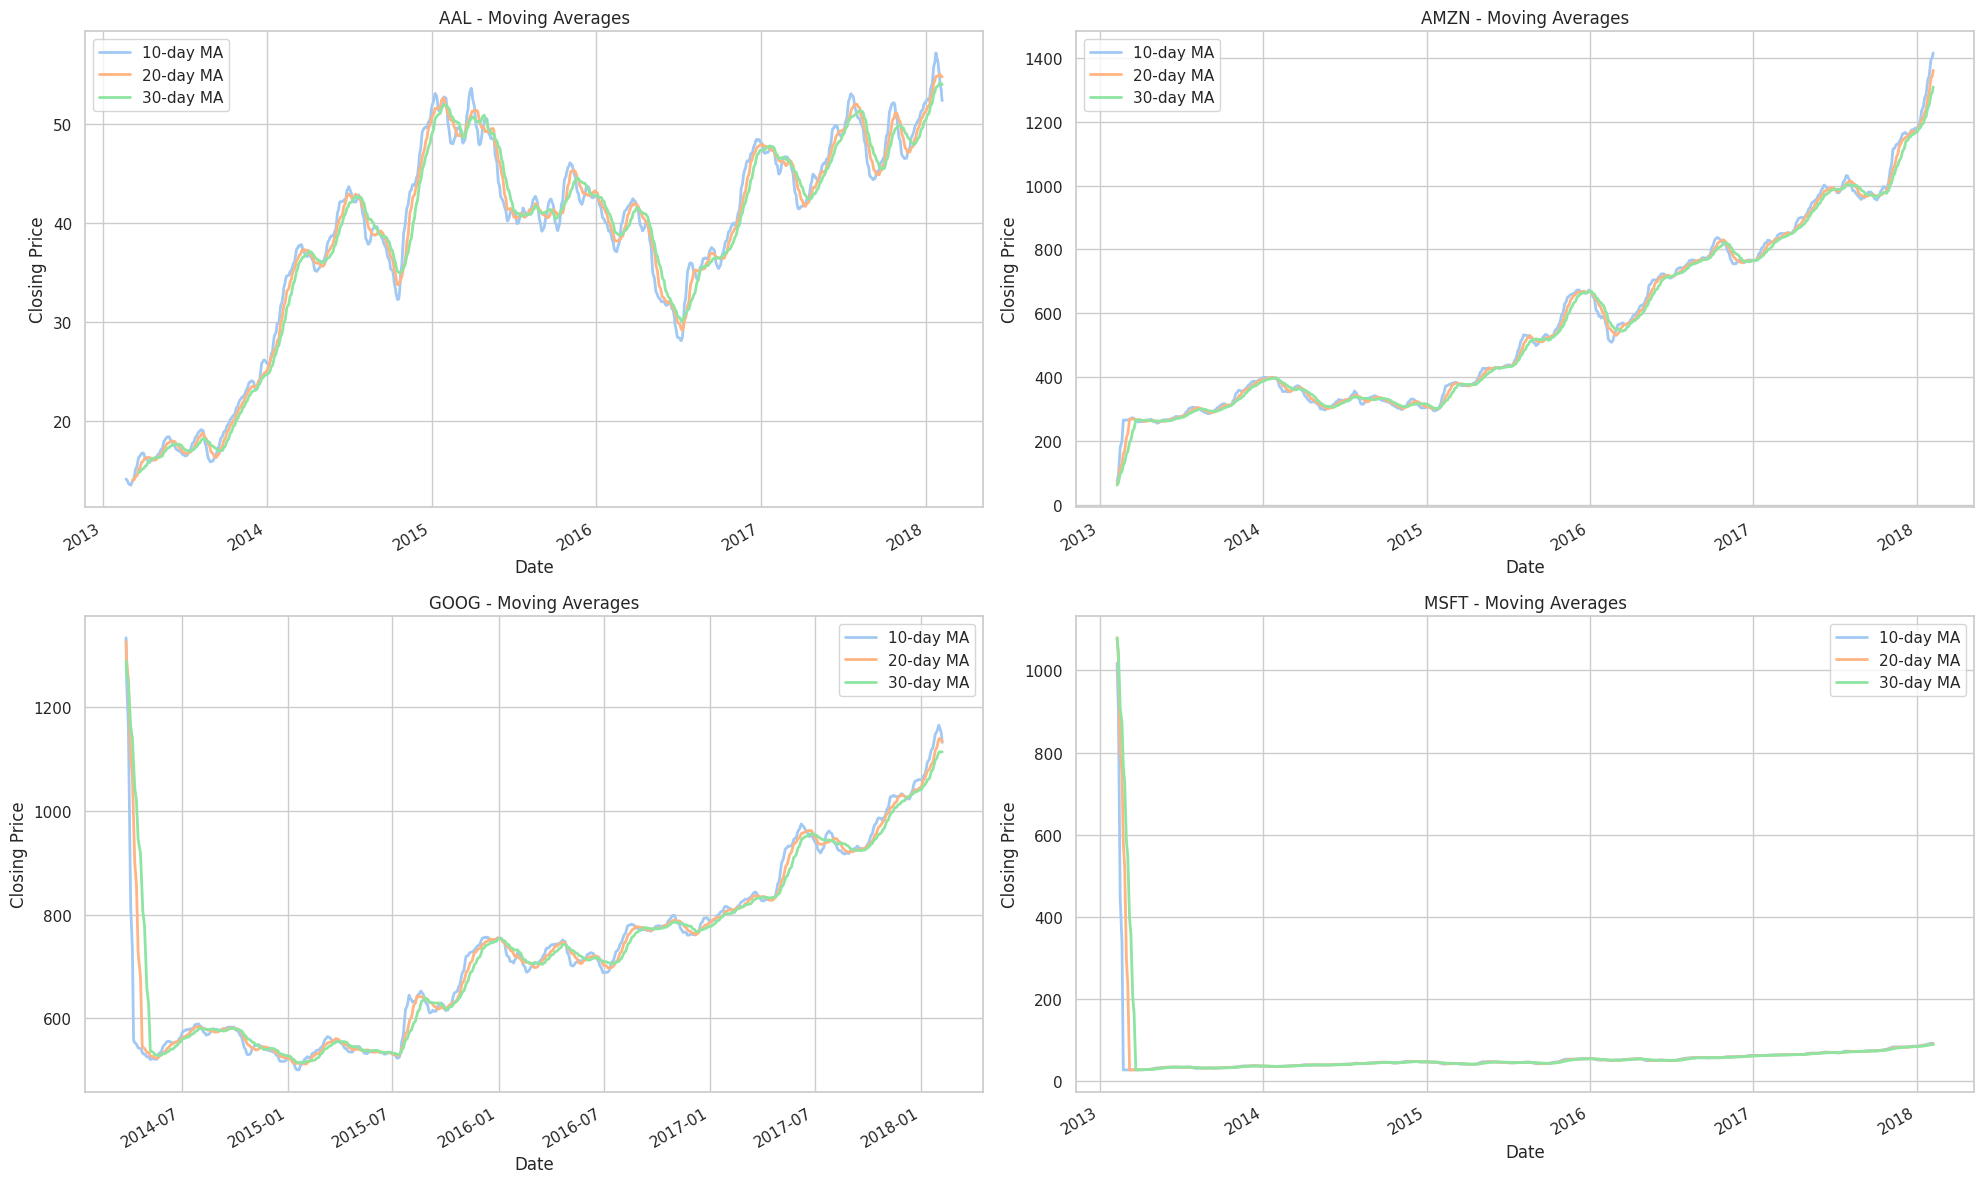

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 12))

for index, company_name in enumerate(unique_companies, 1):
    plt.subplot(2, 2, index)
    
    filter_company = company_new['Name'] == company_name
    company_subset = company_new[filter_company]
    
    company_subset[['close_10_MA', 'close_20_MA', 'close_30_MA']].plot(ax=plt.gca(), linewidth=2)
    
    plt.title(f'{company_name} - Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend(['10-day MA', '20-day MA', '30-day MA'])
    plt.grid(True)
    
    plt.tight_layout()

plt.show()

### Examining fluctuations in the closing price of Apple stock!

When examining fluctuations in the closing price of Apple stock, a detailed analysis of the historical data provides valuable insights into the stock's volatility and market behavior. By scrutinizing the highs and lows in the closing prices over a specific period, one can identify trends, patterns, and potential influencing factors such as product launches, earnings reports, or broader market conditions. Understanding these fluctuations is crucial for investors seeking to make informed decisions, as it allows them to assess the risks and opportunities associated with Apple stock. Additionally, this examination aids analysts in forecasting potential future movements and crafting strategic recommendations based on the observed closing price dynamics.

In [20]:
apple_data = pd.read_csv(company_list[0])

In [21]:
apple_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [22]:
apple_data['close'].head(10)

0    14.75
1    14.46
2    14.27
3    14.66
4    13.99
5    14.50
6    14.26
7    13.33
8    13.37
9    13.57
Name: close, dtype: float64

In [23]:
apple_data['daily return percent'] = apple_data['close'].pct_change() * 100

In [24]:
apple_data.head()

,date,open,high,low,close,volume,Name,daily return percent
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,NaN
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,-1.966102
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,-1.313970
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,2.733006
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,-4.570259


In [25]:
import plotly.express as px

fig = px.line(apple_data, x='date', y='daily return percent', title='Apple Daily Return Percent',
              labels={'daily return percent': 'Daily Return Percent', 'date': 'Date'})

fig.update_traces(line=dict(color='blue'))

fig.show()

### Conducting resampling analysis on the closing price

By conducting resampling analysis on the closing price of Apple stock, I aimed to gain a better understanding of the stock's performance over different time intervals. Utilizing pandas resample function, I computed the monthly, yearly, and quarterly mean closing prices. This approach enables the identification of trends and patterns that might be obscured by daily fluctuations. The monthly means provide insights into short-term variations, while yearly and quarterly means offer a broader perspective on the stock's overall performance. Analyzing these resampled data sets allows for a more comprehensive assessment of the stock's behavior, aiding in the identification of potential seasonal trends or longer-term patterns that may be valuable for investors and analysts in making strategic decisions.

In [26]:
apple_data.dtypes

date                     object
open                    float64
high                    float64
low                     float64
close                   float64
volume                    int64
Name                     object
daily return percent    float64
dtype: object

In [27]:
apple_data['date'] = pd.to_datetime(apple_data['date'])

In [28]:
apple_data.dtypes

date                    datetime64[ns]
open                           float64
high                           float64
low                            float64
close                          float64
volume                           int64
Name                            object
daily return percent           float64
dtype: object

In [29]:
apple_data.set_index('date', inplace=True)

In [30]:
apple_data.head()

,open,high,low,close,volume,Name,daily return percent
date,,,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,NaN
2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,-1.966102
2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,-1.313970
2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,2.733006
2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,-4.570259


In [31]:
import plotly.graph_objects as go

# Resample data
monthly_mean = apple_data['close'].resample('M').mean()
yearly_mean = apple_data['close'].resample('Y').mean()
quarterly_mean = apple_data['close'].resample('Q').mean()

fig = go.Figure()

fig.add_trace(go.Scatter(x=monthly_mean.index, y=monthly_mean.values, mode='lines', name='Monthly Mean'))
fig.add_trace(go.Scatter(x=yearly_mean.index, y=yearly_mean.values, mode='lines', name='Yearly Mean'))
fig.add_trace(go.Scatter(x=quarterly_mean.index, y=quarterly_mean.values, mode='lines', name='Quarterly Mean'))

fig.update_layout(
    title='Apple Stock Close Price Analysis',
    xaxis_title='Date',
    yaxis_title='Close Price',
    legend=dict(title='Resample Frequency'),
)

fig.show()

### Conducting multi-variate analysis to comprehend correlations

Conducting multivariate analysis on the closing prices of Apple, Amazon, Google, and Microsoft stocks is a strategic approach to comprehend the correlations between these tech giants. By organizing the data into a structured DataFrame, where each column represents the closing price of a specific stock, I can employ statistical methods and visualizations to explore the relationships between these variables. Analyzing correlations can unveil potential interdependencies or shared market trends among the stocks, providing investors and analysts with valuable insights for portfolio diversification and risk management. This multivariate analysis serves as a powerful tool for decision-making, allowing for a more holistic understanding of how these prominent stocks move in relation to each other in the market.

In [32]:
apple_data = pd.read_csv(company_list[0])
amazon_data = pd.read_csv(company_list[1])
google_data = pd.read_csv(company_list[2])
microsoft_data = pd.read_csv(company_list[3])

In [33]:
stock_data = {
    'apple_close': apple_data['close'],
    'amazon_close': amazon_data['close'],
    'google_close': google_data['close'],
    'microsoft_close': microsoft_data['close']
}

closing_price = pd.DataFrame(stock_data)

In [34]:
closing_price.head()

,apple_close,amazon_close,google_close,microsoft_close
0,14.75,261.95,558.46,27.55
1,14.46,257.21,559.99,27.86
2,14.27,258.70,556.97,27.88
3,14.66,269.47,567.16,28.03
4,13.99,269.24,567.00,28.04


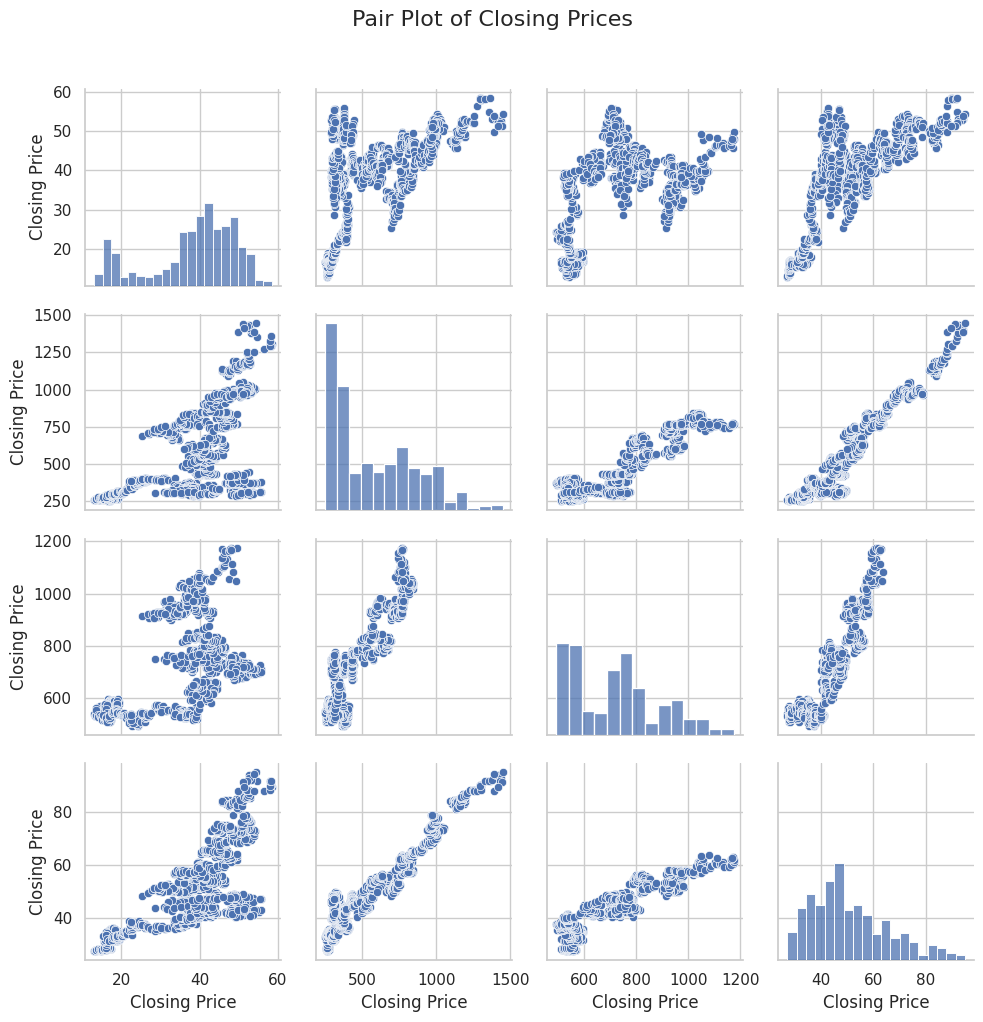

In [35]:
import seaborn as sns

sns.set(style='whitegrid')

pair_plot = sns.pairplot(closing_price)

pair_plot.fig.suptitle('Pair Plot of Closing Prices', y=1.02, fontsize=16)
pair_plot.set(xlabel='Closing Price', ylabel='Closing Price')
pair_plot.fig.tight_layout()

plt.show()

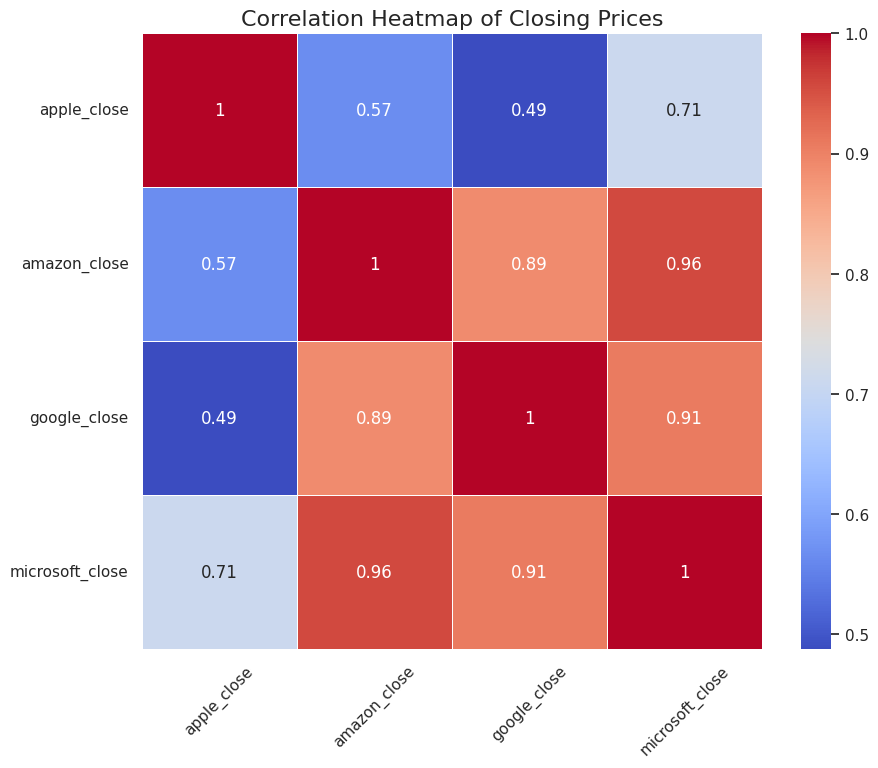

In [36]:
sns.set(style='white')

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(closing_price.corr(), annot=True, cmap='coolwarm', linewidths=.5)


heatmap.set_title('Correlation Heatmap of Closing Prices', fontsize=16)
plt.yticks(rotation=0) 
plt.xticks(rotation=45)

plt.show()

### Conducting correlation analysis

By conducting correlation analysis on the closing prices of Apple, Amazon, Google, and Microsoft stocks, I initiated the process by calculating the percentage change for each stock's closing price. This was achieved by creating new columns in the DataFrame, denoted as 'apple_close_pct_change,' 'amazon_close_pct_change,' 'google_close_pct_change,' and 'microsoft_close_pct_change.' These columns represent the percentage change in closing prices relative to the previous day.

This percentage change data provides a foundation for exploring the relationships between the stocks. Subsequent steps could include calculating correlation coefficients between the percentage changes of different stocks. A positive correlation suggests that the stocks move in the same direction, while a negative correlation indicates opposite movements. This analysis contributes to a comprehensive understanding of how these tech stocks interact in terms of market performance, aiding investors and analysts in making well-informed decisions regarding portfolio construction and risk management.

In [37]:
closing_price.columns

Index(['apple_close', 'amazon_close', 'google_close', 'microsoft_close'], dtype='object')

In [38]:
for col in closing_price.columns:
    closing_price[col+'_pct_change'] = (closing_price[col]-closing_price[col].shift(1))/closing_price[col].shift(1) * 100

In [39]:
closing_price.head()

,apple_close,amazon_close,google_close,microsoft_close,apple_close_pct_change,amazon_close_pct_change,google_close_pct_change,microsoft_close_pct_change
0,14.75,261.95,558.46,27.55,NaN,NaN,NaN,NaN
1,14.46,257.21,559.99,27.86,-1.966102,-1.809506,0.273968,1.125227
2,14.27,258.70,556.97,27.88,-1.313970,0.579293,-0.539295,0.071788
3,14.66,269.47,567.16,28.03,2.733006,4.163123,1.829542,0.538020
4,13.99,269.24,567.00,28.04,-4.570259,-0.085353,-0.028211,0.035676


In [40]:
closing_price.columns

Index(['apple_close', 'amazon_close', 'google_close', 'microsoft_close',
       'apple_close_pct_change', 'amazon_close_pct_change',
       'google_close_pct_change', 'microsoft_close_pct_change'],
      dtype='object')

In [41]:
company_pct_close_change = closing_price[['apple_close_pct_change', 
                                          'amazon_close_pct_change',
                                          'google_close_pct_change',
                                          'microsoft_close_pct_change'
                                         ]]

In [42]:
company_pct_close_change.head()

,apple_close_pct_change,amazon_close_pct_change,google_close_pct_change,microsoft_close_pct_change
0,NaN,NaN,NaN,NaN
1,-1.966102,-1.809506,0.273968,1.125227
2,-1.313970,0.579293,-0.539295,0.071788
3,2.733006,4.163123,1.829542,0.538020
4,-4.570259,-0.085353,-0.028211,0.035676


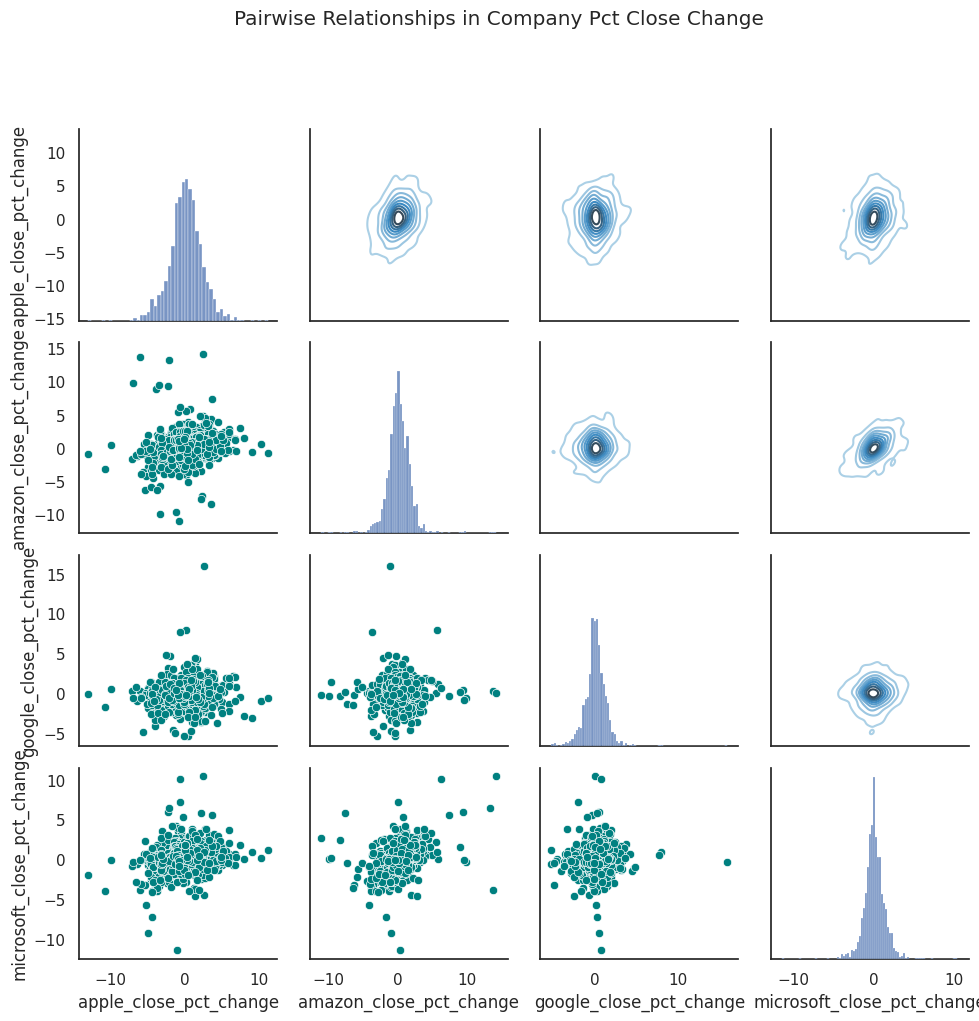

In [43]:
sns.set_theme(style="white")

g = sns.PairGrid(data=company_pct_close_change)

# Map histograms on the diagonal
g.map_diag(sns.histplot, kde_kws={'color': 'darkblue'})

# Map scatter plots on the lower triangle
g.map_lower(sns.scatterplot, color='teal')

# Map kernel density plots on the upper triangle
g.map_upper(sns.kdeplot, cmap='Blues_d')

# Customize the layout and aesthetics
g.fig.suptitle("Pairwise Relationships in Company Pct Close Change", y=1.02)
plt.subplots_adjust(top=0.9)

plt.show()

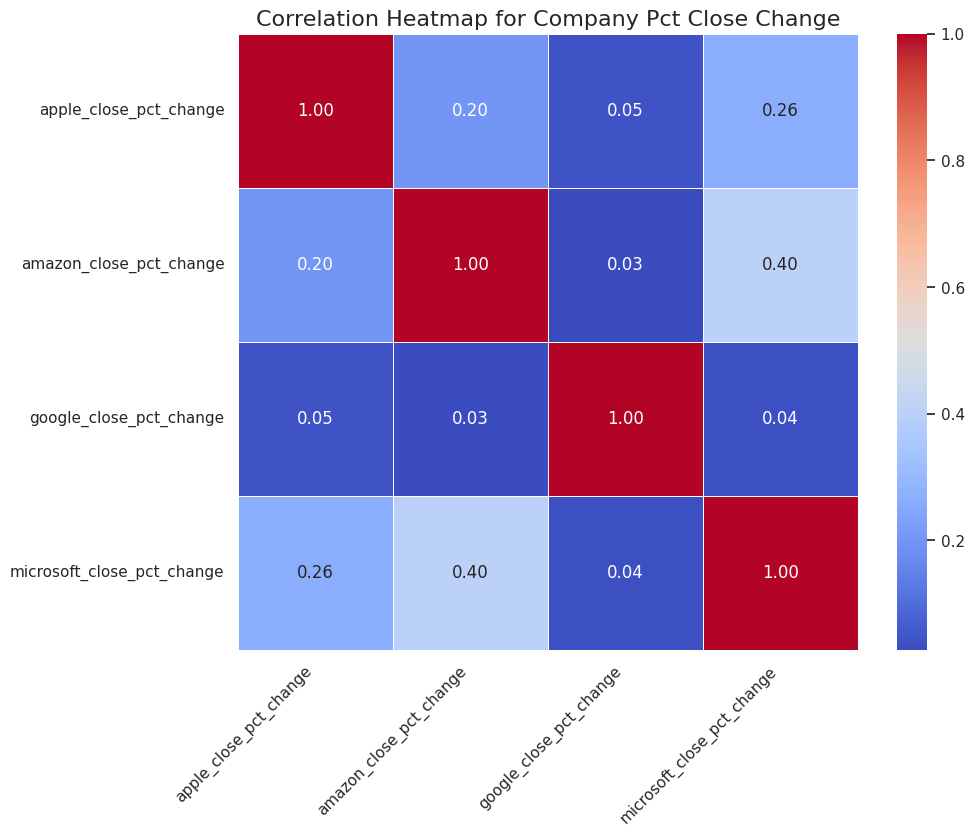

In [44]:
sns.set_theme(style="white")

corr_matrix = company_pct_close_change.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f")

plt.title("Correlation Heatmap for Company Pct Close Change", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()